# Python Model Context

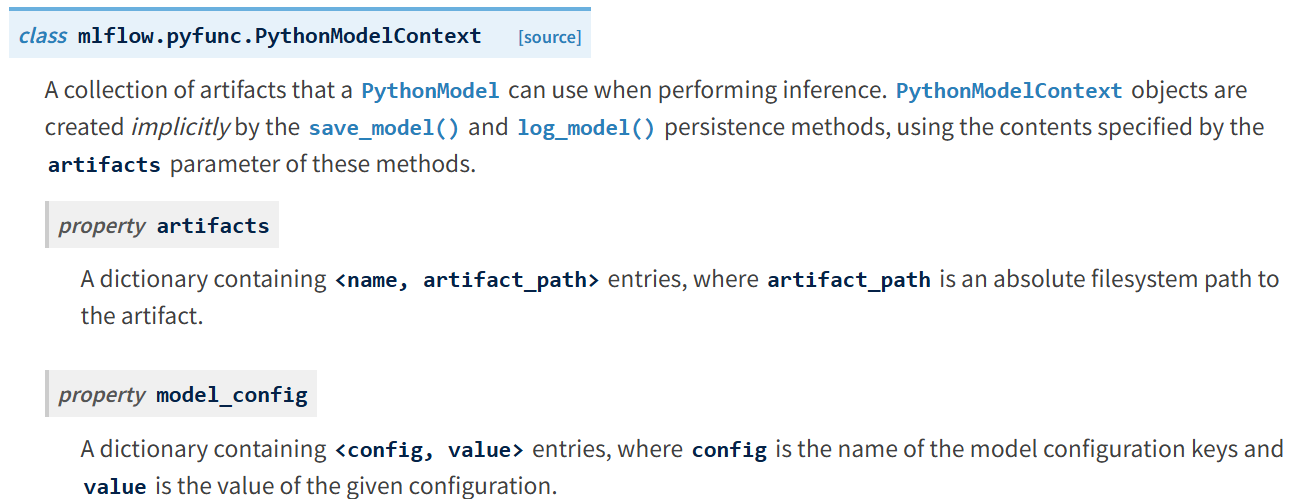





In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
import pandas as pd

In [ ]:
class CustomModel(mlflow.pyfunc.PythonModel):

    def predict(self, context, model_input, params=None):
        print("Context Artifacts: ", context.artifacts)
        print("Context Model Configurations: ", context.model_config)
        return model_input.apply(lambda x: x * 2)
    
    def additional_method(self):
        print("Running an additional method")

In [ ]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model("model", python_model=CustomModel())

In [ ]:
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [ ]:
x_new = pd.DataFrame([1, 2, 3])
prediction = loaded_model.predict(x_new)

### Model Artifacts
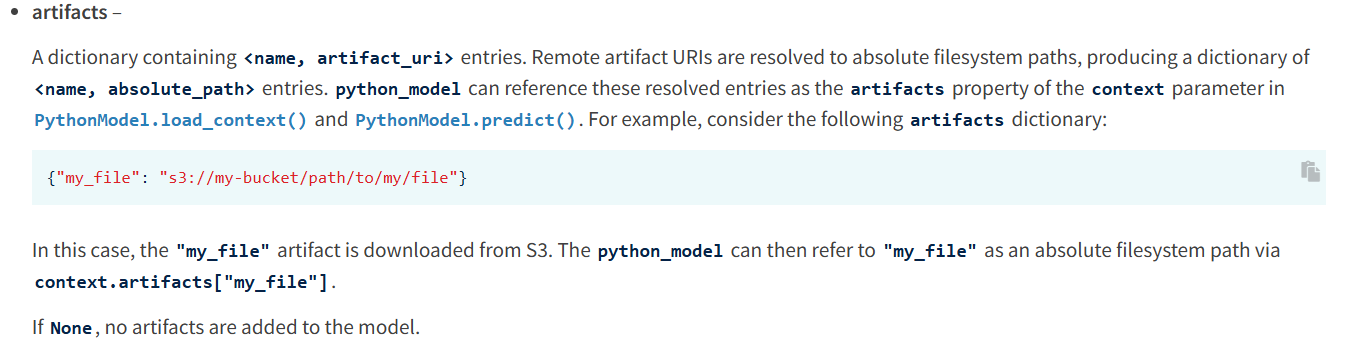

In [ ]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model("model",
                            python_model=CustomModel(),
                            artifacts={"my_file": "/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/src/utils/run_batch.py"})

In [ ]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [ ]:
loaded_model.predict(x_new)

### Model Configurations
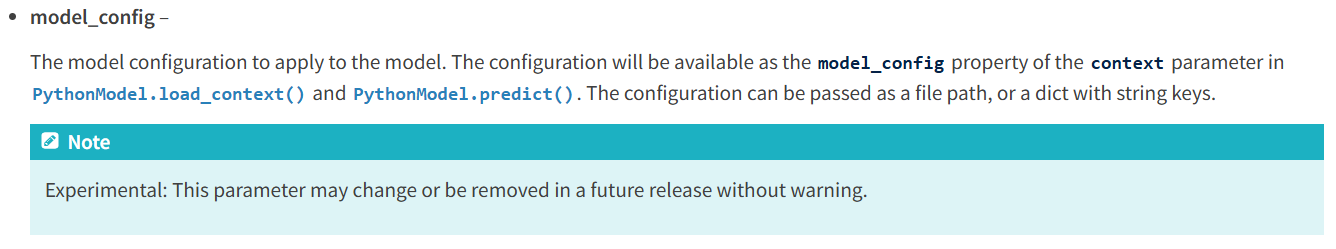

In [ ]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model(
        "model",
        python_model=CustomModel(),
        model_config={"model_name": "My Custom Model"}
    )

In [ ]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [ ]:
loaded_model.predict(x_new)

# Load context

In [ ]:
class CustomModel(mlflow.pyfunc.PythonModel):

    def predict(self, context, model_input, params=None):
        model_name = context.model_config.get("model_name", "default")
        print("Getting predictions from the model {}".format(model_name))
        print("additional inputs: ")
        print(self.df.head())
        return model_input.apply(lambda x: x * 2)
    
    def additional_method(self):
        print("Running an additional method")

    def load_context(self, context):
        print("loading context....")
        import time 
        time.sleep(5)
        artifact = context.artifacts.get("predictions")
        self.df = pd.read_csv(artifact)

        


In [ ]:
with mlflow.start_run(run_name="class_model_context") as run:
    print(run.info.run_id)
    mlflow.pyfunc.log_model(
        "model",
        python_model=CustomModel(),
        artifacts={
            "predictions":"/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/notebooks/experiment_tracking_fundamentals/artifacts_example/predictions.csv"
            },
        model_config={"model_name": "Classifier"}
    )

In [ ]:
# load the model
model_uri = f"runs:/{run.info.run_id}/model"
loaded_model = mlflow.pyfunc.load_model(model_uri)

In [ ]:
predictions = loaded_model.predict(x_new)